In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

dataset= load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[(df['job_country']=='United States')].dropna(subset='salary_year_avg').copy()

In [4]:
job_titles=df_US['job_title_short'].value_counts().index[:6].to_list()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [9]:
df_US_top = df_US[df_US['job_title_short'].isin(job_titles)]

In [17]:
# We need to do a groupby to organize by median salary

df_order = df_US_top.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index


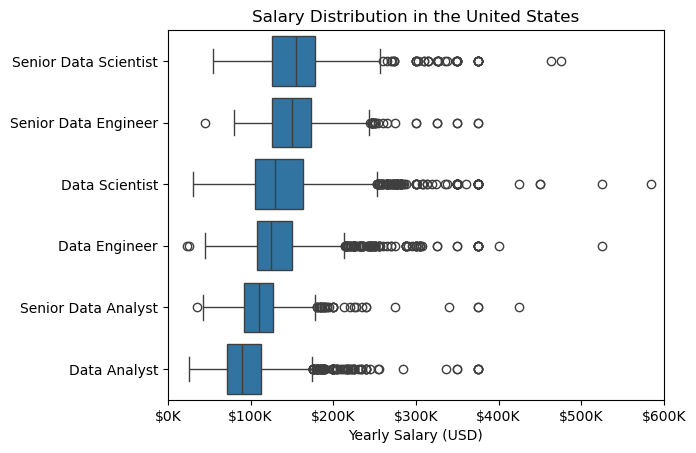

In [21]:
sns.boxplot(data=df_US_top, x='salary_year_avg', y='job_title_short', order= df_order)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary (USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.ylabel('')
plt.show()

# Investigating Median Salary vs Skill for Data Analyst

In [23]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].dropna(subset='salary_year_avg').copy()

In [25]:
df_DA_US = df_DA_US.explode('job_skills')

In [37]:
# First what we want to do is find the top paying skills.

df_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False).head(10)
df_top_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending = False).head(10).sort_values(by='median', ascending=False)

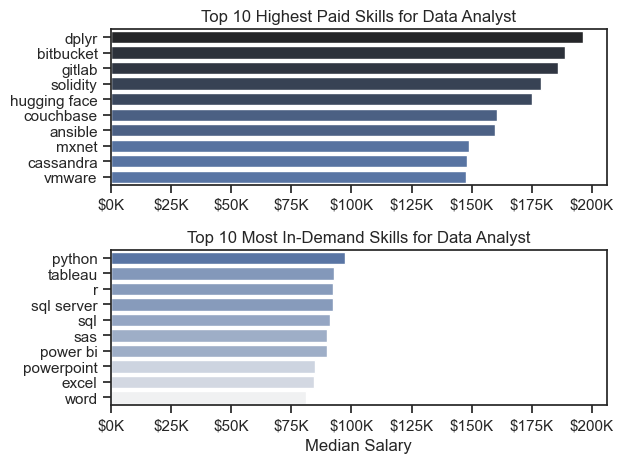

In [38]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")

sns.barplot(data=df_top_pay, x='median', y=df_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)

sns.barplot(data=df_top_skills, x='median', y=df_top_skills.index, ax=ax[1], hue='median', palette='light:b',legend=False)

ax[1].set_xlim(ax[0].get_xlim())
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_xlabel('Median Salary')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
fig.tight_layout()